Opening raw data file measure-2025-11-26_12-27-16-raw.fif...
Isotrak not found
    Range : 0 ... 18999 =      0.000 ...    37.998 secs
Ready.
Reading 0 ... 18999  =      0.000 ...    37.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: [np.str_('closed_eye'), np.str_('open_eye')]
Not setting metadata
2 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2 events and 351 original time points ...
1 bad epochs dropped
X.shape: (1, 8, 351)
n_epochs = 1


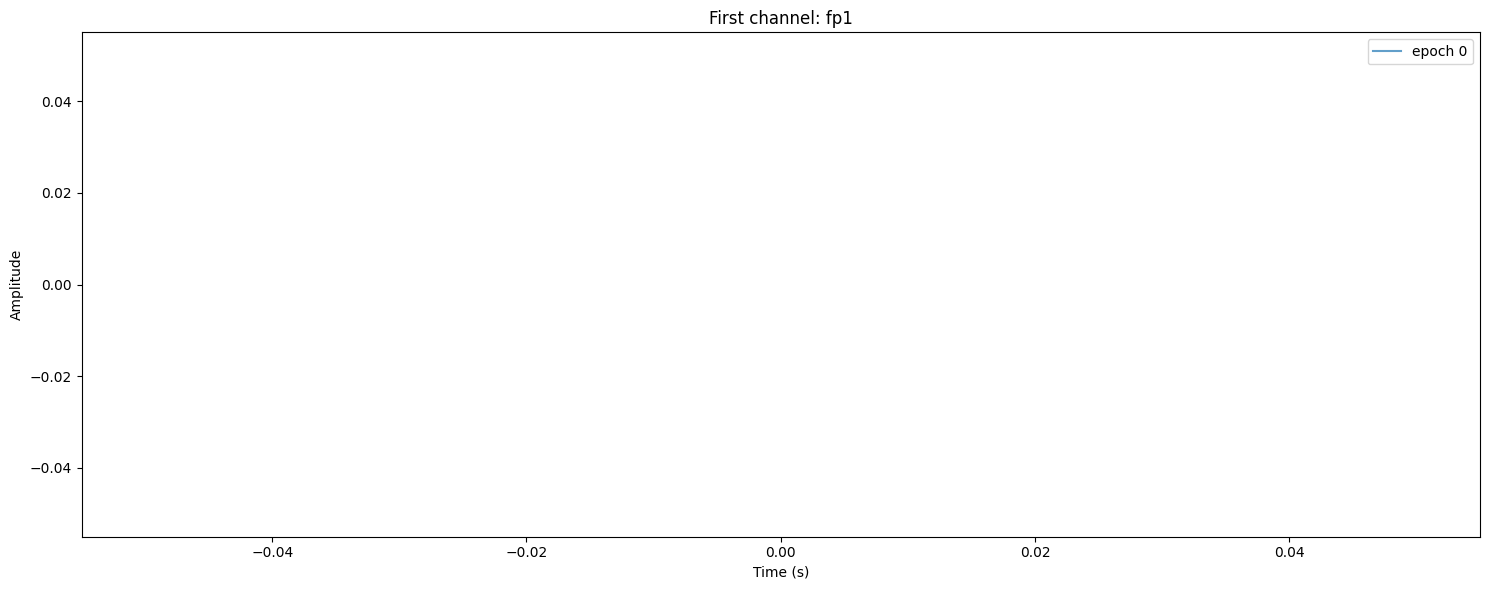

In [10]:

import mne
import numpy as np
import matplotlib.pyplot as plt

file_name = "measure-2025-11-26_12-27-16-raw.fif"

raw = mne.io.read_raw_fif(file_name, preload=True)
raw.set_eeg_reference("average")
events, event_id = mne.events_from_annotations(raw)
epochs = mne.Epochs(
    raw,                # The Raw data object
    events,             # The events array derived from annotations
    event_id=event_id,  # The ID mapping derived from annotations
    # tmin=T_MIN,         # Start time of the epoch
    # tmax=T_MAX,         # End time of the epoch
    preload=True,       # Load all epoched data into memory
)
del raw


# epochs.plot(scalings="auto", show=True)
X = epochs.get_data()  # shape (n_epochs, n_channels, n_times)
print(f"X.shape: {X.shape}")

first_channel_data = X[:, 1, 2000:3000]  # Data for the first channel across all epochs

# l_freq, h_freq = 0.5, 40.0
# first_channel_data = mne.filter.filter_data(first_channel_data, 500, l_freq, h_freq, fir_design='firwin')


n_epochs, n_times = first_channel_data.shape
print(f"{n_epochs = }")
times = np.arange(n_times) / float(epochs.info['sfreq'])

plt.figure(figsize=(15, 6))
for i in range(1):
    plt.plot(times, first_channel_data[i], alpha=0.7, label=f'epoch {i}' if n_epochs <= 10 else None)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'First channel: {epochs.ch_names[0]}')
if n_epochs <= 10:
    plt.legend()
plt.tight_layout()
plt.show()